<a href="https://colab.research.google.com/github/tomat8jpg/ChipSeq/blob/main/ChipSeq_Taran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### установка необходимых программ

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install -q condacolab

In [ ]:
import condacolab

In [ ]:
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:14
🔁 Restarting kernel...


In [ ]:
!conda install -c bioconda seqtk

In [ ]:
!conda install -c bioconda trimmomatic

In [ ]:
!pip install macs2 intervene

In [ ]:
!apt-get install bedtools

In [ ]:
!apt-get install bowtie2 samtools

In [ ]:
!conda install -c bioconda bowtie2

### Установка FastQC

In [ ]:
!java -version

In [ ]:
!wget https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip

In [ ]:
!unzip fastqc_v0.11.9.zip

In [ ]:
!chmod a+x FastQC/fastqc

In [ ]:
!./FastQC/fastqc --help

In [ ]:
pip install multiqc

### Скачивание данных для белка UxuR


In [ ]:
!cd /content/drive/MyDrive/HSE_2022

In [ ]:
!cp -R /content/drive/MyDrive/HSE_2022 /content/

In [ ]:
!mkdir /content/fastqcdata

In [ ]:
!mv /content/HSE_2022/UxuR_1.fastq /content/fastqcdata
!mv /content/HSE_2022/UxuR_2.fastq /content/fastqcdata
!mv /content/HSE_2022/UxuR_control.fastq /content/fastqcdata


### Экстрагируйте риды и обрежьте их с помощью Trimmomatic*

In [ ]:
!./FastQC/fastqc /content/fastqcdata/UxuR_1.fastq
!./FastQC/fastqc /content/fastqcdata/UxuR_2.fastq
!./FastQC/fastqc /content/fastqcdata/UxuR_control.fastq



In [ ]:
import multiqc

In [ ]:
multiqc.run("/content/fastqcdata")

Репорты прикрепляю отдельными файлами, см. папку fqc reports

In [ ]:
!mv /content/fastqcdata/UxuR_1.fastq /content
!mv /content/fastqcdata/UxuR_2.fastq /content
!mv /content/fastqcdata/UxuR_control.fastq /content

In [ ]:
# Необходимо добавить опцию обрезания адаптеров TruSeq, т.к. в репортах fastqc они показываются с высоким процентом
# Последовательность линкера и праймера в TruSeq3-SE, 
# первый шаг начального поиска допускает 2 базовых несоответствия,
# пороговое значение оценки сравнения палендрома 30, 
# порог оценки простого сравнения клипов 10. 

In [ ]:
!trimmomatic -version

0.39


In [ ]:
!trimmomatic SE -phred33 /content/UxuR_1.fastq UxuR_1_trimmed.fastq ILLUMINACLIP:TruSeq3-SE:2:30:10 \
  LEADING:30 TRAILING:30 SLIDINGWINDOW:5:20 MINLEN:40


# Input Reads: 58606277 Surviving: 56486606 (96.38%) Dropped: 2119671 (3.62%)

In [ ]:
!trimmomatic SE -phred33 /content/UxuR_2.fastq UxuR_2_trimmed.fastq ILLUMINACLIP:TruSeq3-SE:2:30:10 \
  LEADING:30 TRAILING:30 SLIDINGWINDOW:5:20 MINLEN:40

#Input Reads: 23901482 Surviving: 23532345 (98.46%) Dropped: 369137 (1.54%)

!trimmomatic SE -phred33 /content/UxuR_control.fastq UxuR_control_trimmed.fastq ILLUMINACLIP:TruSeq3-SE:2:30:10 \
  LEADING:30 TRAILING:30 SLIDINGWINDOW:5:20 MINLEN:40

#Input Reads: 22987727 Surviving: 22687484 (98.69%) Dropped: 300243 (1.31%)


In [ ]:
# Удаляю неподрезанные чтения, чтобы не мешались и не занимали место
!rm -d UxuR_1.fastq
!rm -d UxuR_2.fastq
!rm -d UxuR_control.fastq

Повторный контроль качества

In [ ]:
!./FastQC/fastqc /content/UxuR_1_trimmed.fastq
!./FastQC/fastqc /content/UxuR_2_trimmed.fastq
!./FastQC/fastqc /content/UxuR_control_trimmed.fastq


In [ ]:
!mkdir trimmfqc

In [ ]:
!mv /content/UxuR_1_trimmed_fastqc.html /content/trimmfqc
!mv /content/UxuR_2_trimmed_fastqc.html /content/trimmfqc
!mv /content/UxuR_1_trimmed_fastqc.zip /content/trimmfqc
!mv /content/UxuR_2_trimmed_fastqc.zip /content/trimmfqc


In [ ]:
!mv /content/UxuR_control_trimmed_fastqc.html /content/trimmfqc
!mv /content/UxuR_control_trimmed_fastqc.zip /content/trimmfqc

In [ ]:
!rm -d UxuR_1_fastqc.html
!rm -d UxuR_2_fastqc.html
!rm -d UxuR_control_fastqc.html
!rm -d UxuR_1_fastqc.zip
!rm -d UxuR_2_fastqc.zip
!rm -d UxuR_control_fastqc.zip

In [ ]:
# !multiqc .


  /// ]8;id=263208;https://multiqc.info\MultiQC]8;;\ 🔍 | v1.13

|           multiqc | Search path : /content

Aborted.


In [ ]:
multiqc.run("/content/trimmfqc")

/// ]8;id=13196;https://multiqc.info\MultiQC]8;;\ 🔍 | v1.13

|           multiqc | Search path : /content/trimmfqc


Output()

|            fastqc | Found 3 reports
|           multiqc | Compressing plot data
|           multiqc | Report      : multiqc_report.html
|           multiqc | Data        : multiqc_data
|           multiqc | MultiQC complete


{'report': <module 'multiqc.utils.report' from '/usr/local/lib/python3.8/site-packages/multiqc/utils/report.py'>,
 'config': <module 'multiqc.utils.config' from '/usr/local/lib/python3.8/site-packages/multiqc/utils/config.py'>,
 'sys_exit_code': 0}

In [ ]:
!rm -d /content/trimmfqc/UxuR_1_trimmed_fastqc.html
!rm -d /content/trimmfqc/UxuR_2_trimmed_fastqc.html
!rm -d /content/trimmfqc/UxuR_control_trimmed_fastqc.html
!rm -d /content/trimmfqc/UxuR_1_trimmed_fastqc.zip
!rm -d /content/trimmfqc/UxuR_2_trimmed_fastqc.zip
!rm -d /content/trimmfqc/UxuR_control_trimmed_fastqc.zip

### Наложите на геном E. coli K-12 MG1655 genome с помощью Bowtie *

In [ ]:
! wget "https://www.ncbi.nlm.nih.gov/sviewer/viewer.cgi?tool=portal&save=file&log$=seqview&db=nuccore&report=fasta&id=545778205&extrafeat=null&conwithfeat=on&hide-cdd=on" -O U00096.3.fasta

In [ ]:
!bowtie2-build U00096.3.fasta genome_index

In [ ]:
# реплика1
%%time
!bowtie2  -p 2 \
          -x genome_index \
          -U UxuR_1_trimmed.fastq \
          -S UxuR_1.sam

56486606 reads; of these:
  56486606 (100.00%) were unpaired; of these:
    19894124 (35.22%) aligned 0 times
    35378152 (62.63%) aligned exactly 1 time
    1214330 (2.15%) aligned >1 times
64.78% overall alignment rate
CPU times: user 11.6 s, sys: 1.39 s, total: 12.9 s
Wall time: 25min 28s


In [ ]:
!rm -d UxuR_1_trimmed.fastq

In [ ]:
# реплика2
%%time
!bowtie2  -p 2 \
          -x genome_index \
          -U UxuR_2_trimmed.fastq \
          -S UxuR_2.sam

23532345 reads; of these:
  23532345 (100.00%) were unpaired; of these:
    3574800 (15.19%) aligned 0 times
    19255417 (81.83%) aligned exactly 1 time
    702128 (2.98%) aligned >1 times
84.81% overall alignment rate
CPU times: user 5.93 s, sys: 709 ms, total: 6.64 s
Wall time: 12min 26s


In [ ]:
!rm -d UxuR_2_trimmed.fastq

In [ ]:
# контроль
%%time
!bowtie2  -p 2 \
          -x genome_index \
          -U UxuR_control_trimmed.fastq \
          -S UxuR_control.sam

22687484 reads; of these:
  22687484 (100.00%) were unpaired; of these:
    7496141 (33.04%) aligned 0 times
    14692726 (64.76%) aligned exactly 1 time
    498617 (2.20%) aligned >1 times
66.96% overall alignment rate
CPU times: user 5.53 s, sys: 640 ms, total: 6.17 s
Wall time: 10min 57s


In [ ]:
!rm -d UxuR_control_trimmed.fastq

Преобразование .sam в .bam 

In [ ]:
!samtools view -h -S -b -o UxuR_1.bam UxuR_1.sam
!samtools view -h -S -b -o UxuR_2.bam UxuR_2.sam
!samtools view -h -S -b -o UxuR_control.bam UxuR_control.sam


In [ ]:
!rm -d /content/UxuR_1.sam 
!rm -d /content/UxuR_2.sam
!rm -d /content/UxuR_control.sam


In [ ]:
!cp -R /content/drive/MyDrive/bams/UxuR_1.bam /content/
!cp -R /content/drive/MyDrive/bams/UxuR_2.bam /content/
!cp -R /content/drive/MyDrive/bams/UxuR_control.bam /content/


### Peak calling

In [ ]:
!mkdir macs2_1

In [ ]:
!macs2 callpeak -t UxuR_1.bam \
    -c UxuR_control.bam \
 	  -f BAM \
    -g 4.6e+6 \
    --extsize 147 \
    --nomodel \
    --keep-dup=auto \
	  --outdir macs2_1

In [ ]:
!mkdir macs2_2

In [ ]:
!macs2 callpeak -t UxuR_2.bam \
    -c UxuR_control.bam \
 	  -f BAM \
    -g 4.6e+6 \
    --extsize 147 \
    --nomodel \
    --keep-dup=auto \
	  --outdir macs2_2

In [ ]:
!wc -l /content/macs2_1/NA_peaks.narrowPeak

1589 /content/macs2_1/NA_peaks.narrowPeak


In [ ]:
!wc -l /content/macs2_2/NA_peaks.narrowPeak

210 /content/macs2_2/NA_peaks.narrowPeak


Пиков в 1 реплике больше чем во второй, возможно, в эксперименте 1 было больше белка в клетке, напимер увеличена его экспрессия. Или во втором эксперименте проверяли частичный нокаут этого белка

### Игры с аннотацией

In [ ]:
!wget -O annotation.gff.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz
!gzip -d annotation.gff.gz

In [ ]:
!pip install gffpandas


In [ ]:
import gffpandas.gffpandas as gffpd

In [54]:
annotation = gffpd.read_gff3('annotation.gff').df
annotation = annotation.loc[annotation['type']=='CDS']
annotation.head()

,seq_id,source,type,start,end,score,strand,phase,attributes
2,NC_000913.3,RefSeq,CDS,190,255,.,+,0,ID=cds-NP_414542.1;Parent=gene-b0001;Dbxref=Un...
4,NC_000913.3,RefSeq,CDS,337,2799,.,+,0,ID=cds-NP_414543.1;Parent=gene-b0002;Dbxref=Un...
6,NC_000913.3,RefSeq,CDS,2801,3733,.,+,0,ID=cds-NP_414544.1;Parent=gene-b0003;Dbxref=Un...
8,NC_000913.3,RefSeq,CDS,3734,5020,.,+,0,ID=cds-NP_414545.1;Parent=gene-b0004;Dbxref=Un...
10,NC_000913.3,RefSeq,CDS,5234,5530,.,+,0,ID=cds-NP_414546.1;Parent=gene-b0005;Dbxref=Un...


In [55]:
p = annotation.at[2, 'attributes']
p

'ID=cds-NP_414542.1;Parent=gene-b0001;Dbxref=UniProtKB/Swiss-Prot:P0AD86,Genbank:NP_414542.1,ASAP:ABE-0000006,ECOCYC:EG11277,GeneID:944742;Name=NP_414542.1;gbkey=CDS;gene=thrL;locus_tag=b0001;orig_transcript_id=gnl|b0001|mrna.NP_414542;product=thr operon leader peptide;protein_id=NP_414542.1;transl_table=11'

In [56]:
annotation[['a', 'b', 'c', 'd', 'e', 'gene', 'f', 'g', 'product', 'h', 'g', 'e']] = annotation['attributes'].str.split(';', expand=True)
annotation.drop(['attributes', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'e'], axis=1, inplace=True)
annotation.reset_index(drop=True, inplace=True)
annotation.drop(['seq_id', 'source', 'type'], axis=1, inplace=True)
annotation['chr'] = 'U00096.3'
annotation.drop(['phase'], axis = 1, inplace = True)
annotation.head()

,start,end,score,strand,gene,product,chr
0,190,255,.,+,gene=thrL,product=thr operon leader peptide,U00096.3
1,337,2799,.,+,gene=thrA,product=fused aspartate kinase/homoserine dehy...,U00096.3
2,2801,3733,.,+,gene=thrB,product=homoserine kinase,U00096.3
3,3734,5020,.,+,gene=thrC,product=threonine synthase,U00096.3
4,5234,5530,.,+,gene=yaaX,product=DUF2502 domain-containing protein YaaX,U00096.3


In [57]:
ann = annotation.reindex(columns=['chr','start','end','strand','gene','product'])
ann['strand'] = '.'
ann.head()

,chr,start,end,strand,gene,product
0,U00096.3,190,255,.,gene=thrL,product=thr operon leader peptide
1,U00096.3,337,2799,.,gene=thrA,product=fused aspartate kinase/homoserine dehy...
2,U00096.3,2801,3733,.,gene=thrB,product=homoserine kinase
3,U00096.3,3734,5020,.,gene=thrC,product=threonine synthase
4,U00096.3,5234,5530,.,gene=yaaX,product=DUF2502 domain-containing protein YaaX


In [46]:
ann.sort_values('start', axis = 0, inplace = True)

In [47]:
ann.to_csv('annotation_sorted.bed', sep='\t', header = False, index = False)

In [25]:
import pandas as pd


### Табличка с генами

In [ ]:
!apt-get install bedops

In [9]:
!sortBed -i /content/macs2_1/NA_peaks.narrowPeak >peaks_UxuR1_sorted.narrowPeak
!sortBed -i /content/macs2_2/NA_peaks.narrowPeak >peaks_UxuR2_sorted.narrowPeak

In [51]:
!bedtools closest -a peaks_UxuR1_sorted.narrowPeak -b /content/annotation_sorted.bed > annotated_peaks_UxuR_1.bed

In [50]:
!bedtools closest -a peaks_UxuR2_sorted.narrowPeak -b /content/annotation_sorted.bed > annotated_peaks_UxuR_2.bed

In [62]:
colnames = ['chr','start','end', 'name', 'score', 'strand','signalValue ','pValue ', 'qValue', 'peak', 'ann_chr','ann_start','ann_end','ann_strand','gene','product' ]
ann_peaks_UxuR1 = pd.read_csv('annotated_peaks_UxuR_1.bed', sep ='\t', names = colnames)
ann_peaks_UxuR1.drop(['score', 'strand', 'ann_chr', 'ann_strand'], axis = 1, inplace = True)
ann_peaks_UxuR1.head()

,chr,start,end,name,signalValue,pValue,qValue,peak,ann_start,ann_end,gene,product
0,U00096.3,842,1055,NA_peak_1,1.31492,11.91800,9.66208,63,337,2799,gene=thrA,product=fused aspartate kinase/homoserine dehy...
1,U00096.3,3335,3631,NA_peak_2,1.31606,12.44780,10.15200,171,2801,3733,gene=thrB,product=homoserine kinase
2,U00096.3,4350,4677,NA_peak_3,1.22248,7.30397,5.53832,207,3734,5020,gene=thrC,product=threonine synthase
3,U00096.3,6196,6358,NA_peak_4,1.19960,5.23834,3.78789,71,5683,6459,gene=yaaA,product=DNA binding and peroxide stress respon...
4,U00096.3,9468,9744,NA_peak_5,1.21080,6.71305,5.03398,104,9306,9893,gene=mog,product=molybdopterin adenylyltransferase


In [63]:
ann_peaks_UxuR2 = pd.read_csv('annotated_peaks_UxuR_2.bed', sep ='\t', names = colnames)
ann_peaks_UxuR2.drop(['score', 'strand', 'ann_chr', 'ann_strand'], axis = 1, inplace = True)
ann_peaks_UxuR2.head()

,chr,start,end,name,signalValue,pValue,qValue,peak,ann_start,ann_end,gene,product
0,U00096.3,142,380,NA_peak_1,1.34428,12.54220,10.13800,111,190,255,gene=thrL,product=thr operon leader peptide
1,U00096.3,142,380,NA_peak_1,1.34428,12.54220,10.13800,111,337,2799,gene=thrA,product=fused aspartate kinase/homoserine dehy...
2,U00096.3,1876,2126,NA_peak_2,1.26976,8.65797,6.51969,48,337,2799,gene=thrA,product=fused aspartate kinase/homoserine dehy...
3,U00096.3,6549,6732,NA_peak_3,1.25144,7.76811,5.69759,45,6529,7959,gene=yaaJ,product=putative transporter YaaJ
4,U00096.3,31867,32026,NA_peak_4,1.20748,6.26589,4.31204,118,30817,34038,gene=carB,product=carbamoyl-phosphate synthetase large s...


In [64]:
ann_peaks_UxuR1.to_csv('ann_peaks_UxuR1.csv', sep=',', header = True, index = False)
ann_peaks_UxuR2.to_csv('ann_peaks_UxuR2.csv', sep=',', header = True, index = False)

###На основании найденных пиков предположите, какие функции могут выполнять белки UxuR   
Судя по таблицам, пики находятся у совершенно различных генов, выполняющих разные функции. Сложно их объединить в одну группу. Также можно заметить, что пики расположены у начала/конца кодирующих областей генома, соответствующих генам. Видимо, белок UxuR является регуляторным. Возможно, ДНК-связывающим регулятором транскрипции. 

### Используя ChIPMunk, найдите мотив для выбранного белка

In [ ]:
!bedtools getfasta -fi U00096.3.fasta -bed /content/peaks_UxuR1_sorted.narrowPeak -fo Motif_UxuR_1.fasta

index file U00096.3.fasta.fai not found, generating...


In [ ]:
!bedtools getfasta -fi U00096.3.fasta -bed /content/peaks_UxuR2_sorted.narrowPeak -fo Motif_UxuR_2.fasta

In [ ]:
!wget https://autosome.org/ChIPMunk/chipmunk.jar

In [ ]:
!java -cp chipmunk.jar ru.autosome.ChIPMunk s:Motif_UxuR_1.fasta > ChIPMunk_UxuR_1.txt

In [ ]:
from google.colab import files


In [ ]:
files.download('ChIPMunk_UxuR_1.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!java -cp chipmunk.jar ru.autosome.ChIPMunk s:Motif_UxuR_2.fasta > ChIPMunk_UxuR_2.txt

In [ ]:
files.download('ChIPMunk_UxuR_2.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Подготовка файлов для Weblogo

Перед следующим шагом у файлов из ChipMunk была удаена шапка

In [ ]:
ChIPMunk_UxuR_1 = pd.read_csv('/content/ChIPMunk_UxuR_1.txt', sep = '\t', names = ['LIST|seq#',	'pos#',	'word',	'score',	'strand',	'weight' ])
ChIPMunk_UxuR_1.drop(['pos#','score', 'strand', 'weight'], axis = 1, inplace = True)
ChIPMunk_UxuR_1.drop(['LIST|seq#'], axis = 1, inplace = True)
ChIPMunk_UxuR_1.head()

,word
0,CCGCCAGCGCCGCC
1,CCGCCAGCGCCAGC
2,CCGCCAGCGCCGCG
3,CCGCCAGCGCCACG
4,CCGCCAGCGCCTCC


In [ ]:
!sudo apt-get install ruby-full

In [ ]:
ChIPMunk_UxuR_1.to_csv('ChIPMunk_UxuR_1.csv', sep=';', header = False)

In [ ]:
!ruby -ne 'puts ">" + $_.split(";").first(2).join("\n")' ChIPMunk_UxuR_1.csv > ChIPMunk_UxuR_1.fasta

In [ ]:
ChIPMunk_UxuR_2 = pd.read_csv('/content/ChIPMunk_UxuR_2.txt', sep = '\t', names = ['LIST|seq#',	'pos#',	'word',	'score',	'strand',	'weight' ])
ChIPMunk_UxuR_2.drop(['LIST|seq#', 'pos#','score', 'strand', 'weight'], axis = 1, inplace = True)
ChIPMunk_UxuR_2.head()

,word
0,CTGCTTTTGCAAC
1,CTTCTTTTGCAAC
2,CTTCTTTTGCAAC
3,CTTCTTTTGCAAC
4,CTTCTTTTGCAAC


In [ ]:
ChIPMunk_UxuR_2.to_csv('ChIPMunk_UxuR_2.csv', sep=';', header = False)

In [ ]:
!ruby -ne 'puts ">" + $_.split(";").first(2).join("\n")' ChIPMunk_UxuR_2.csv > ChIPMunk_UxuR_2.fasta

### Далее были нарисованы логотипы мотивов, связывающихся белком UxuR в первом и втором случаях. Для этого был использован сайт https://weblogo.threeplusone.com/create.cgi 

UxuR1:
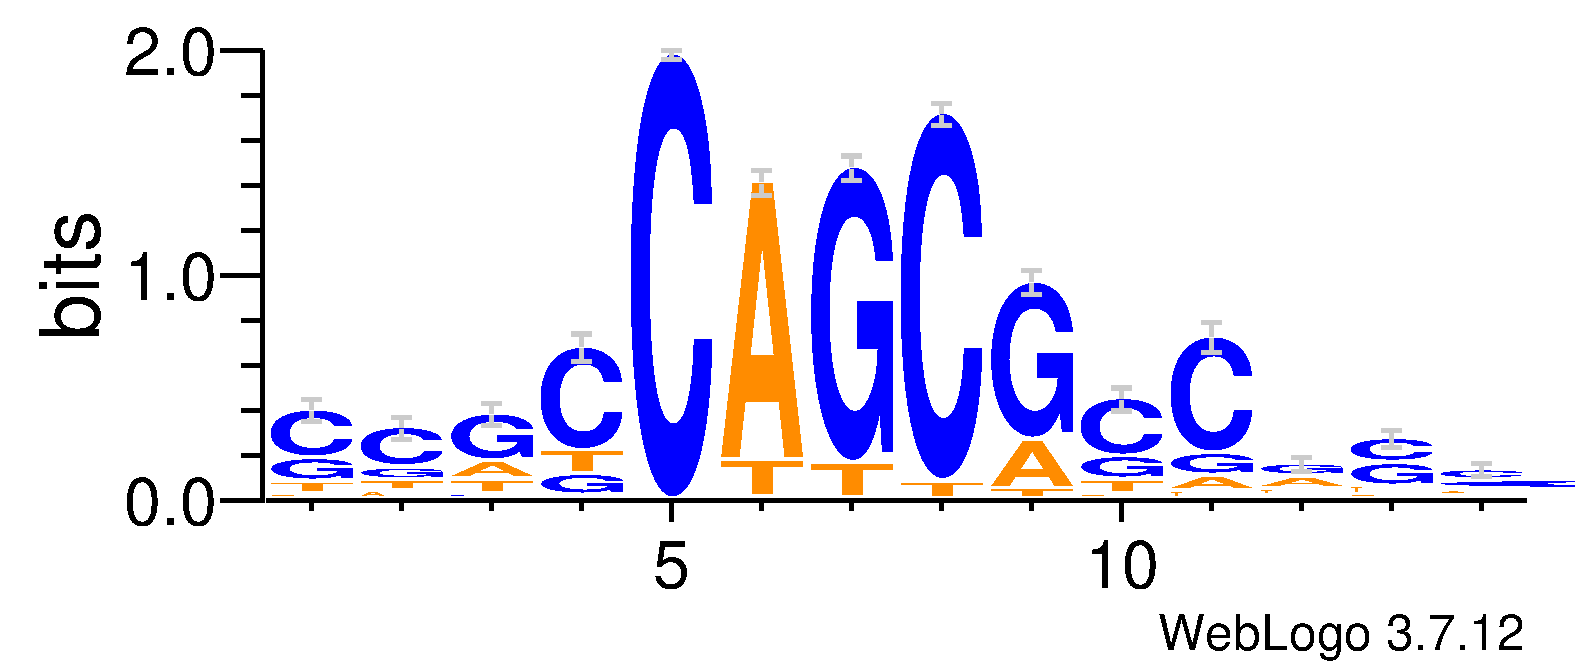

UxuR2:
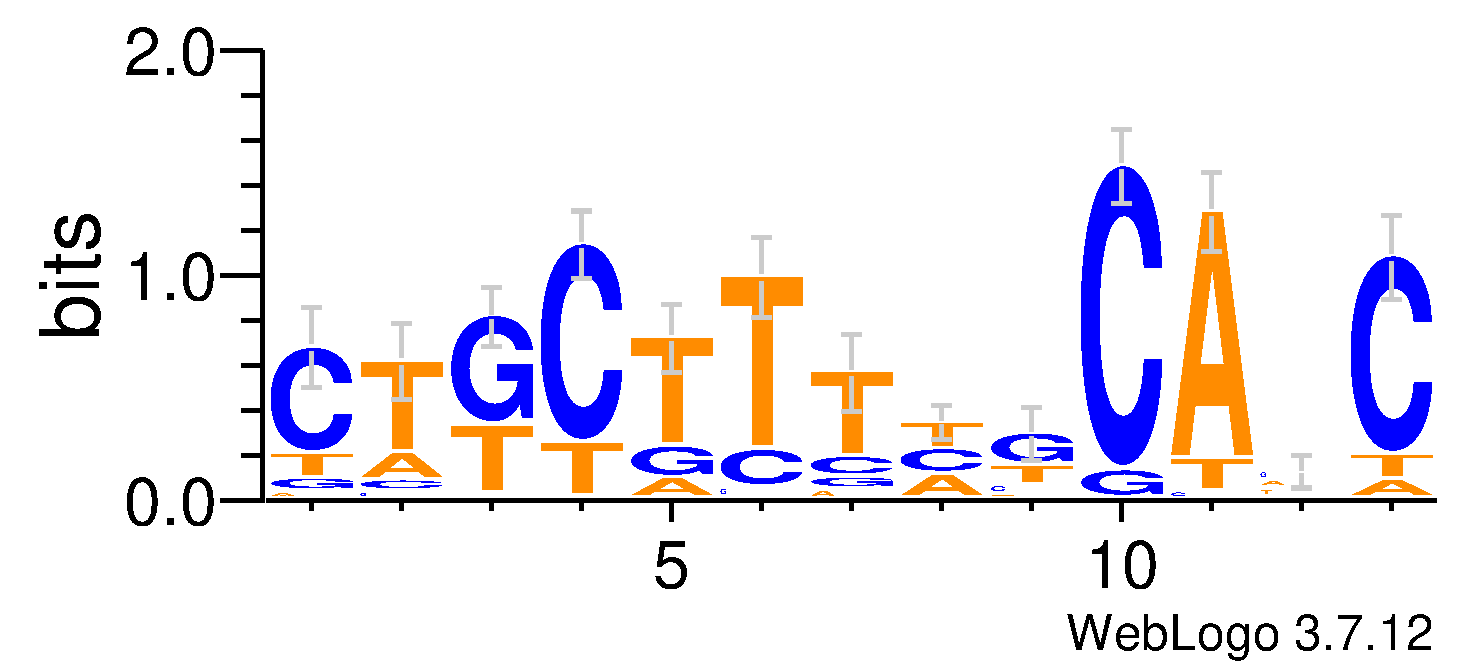